# Michael Navarro: Competency 1 - Project 2

In [2]:
#----------------------------------------------------------------------------------------
#                                       Imports 
#----------------------------------------------------------------------------------------
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

#----------------------------------------------------------------------------------------
#                                   Global Constants
#----------------------------------------------------------------------------------------
HOME_DIR = os.getcwd()
DATASET_DIR = os.path.join(HOME_DIR, 'datasets')
STUDENT_DATA_FNAME = "student-mat.csv"

#----------------------------------------------------------------------------------------
#                                   Helper functions 
#----------------------------------------------------------------------------------------
def load_dataset(fname):
    ''' Returns a csv file as a numpy object'''
    file_path = os.path.join(DATASET_DIR, fname)
    return pd.read_csv(file_path)
# end load_dataset()

## Requirement #01: 
Load the dataset from the repository

In [3]:
# Only choose one of the following students intialization methods
# game_sales = load_dataset(STUDENT_DATA_FNAME)
students = pd.read_csv(STUDENT_DATA_FNAME, delimiter=';')

# Factorize/Enumerate text cols for arithmetic
students['school'] = students.school.factorize()[0]
students['sex'] = students.sex.factorize()[0]
students['Mjob'] = students.Mjob.factorize()[0]
students['Fjob'] = students.Fjob.factorize()[0]

## Requirement #02: 
Display 6 rows of the dataset

In [4]:
students.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,U,GT3,A,4,4,0,0,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,U,GT3,T,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,U,LE3,T,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,U,GT3,T,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,U,GT3,T,3,3,2,1,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,U,LE3,T,4,3,3,1,...,5,4,2,1,2,5,10,15,15,15


## Requirement #03: 
How many rows and columns in the dataset?

In [5]:
num_rows = len(students)
num_cols =  len(students.columns)

print(f'Number of Rows: {num_rows}')
print(f'Number of Cols: {num_cols}')

Number of Rows: 395
Number of Cols: 33


## Requirement #04:
How disperse are the values in the dataset?

In [6]:
print('The following are the standard deviations for each attribute column')
students.std(numeric_only=True)

The following are the standard deviations for each attribute column


school        0.321177
sex           0.499926
age           1.276043
Medu          1.094735
Fedu          1.088201
Mjob          1.227473
Fjob          0.889572
traveltime    0.697505
studytime     0.839240
failures      0.743651
famrel        0.896659
freetime      0.998862
goout         1.113278
Dalc          0.890741
Walc          1.287897
health        1.390303
absences      8.003096
G1            3.319195
G2            3.761505
G3            4.581443
dtype: float64

Judging from the standard deviations, the data is not very dispersed except for a the last 4 attributes which show more deviations than the rest.

## Requirement #05:
Show a summary of the numerical attributes in the dataset

In [7]:
students.describe()

,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,2.749367,2.521519,2.169620,1.450633,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.321177,0.499926,1.276043,1.094735,1.088201,1.227473,0.889572,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,0.000000,17.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,0.000000,1.000000,18.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Requirement #06: 
What are the attributes in the dataset? What are the data types of each attribute?

In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    int64 
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    int64 
 9   Fjob        395 non-null    int64 
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Requirement #07:
What is the label? What is the datatype of the label?

In [9]:
print(f"Dataset Label: {students['G3'].name} (Final Grade)")
print(f"Label Datatype: {students['G3'].dtype}")

Dataset Label: G3 (Final Grade)
Label Datatype: int64


## Requirement #08:
Create a dataframe that includes only the features

In [10]:
# school        0.321177
# sex           0.499926
# age           1.276043
# Medu          1.094735
# Fedu          1.088201
# Mjob          1.227473
# Fjob          0.889572
# traveltime    0.697505
# studytime     0.839240
# failures      0.743651
# famrel        0.896659
# freetime      0.998862
# goout         1.113278
# Dalc          0.890741
# Walc          1.287897
# health        1.390303
# absences      8.003096
# G1            3.319195
# G2

features = students[['school', 'sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime',
 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']].copy()

features.head()

,school,sex,age,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,4,4,0,0,2,2,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,0,1,1,2,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,0,1,1,2,3,4,3,2,2,3,3,10,7,8
3,0,0,15,4,2,1,2,1,3,0,3,2,2,1,1,5,2,15,14
4,0,0,16,3,3,2,1,1,2,0,4,3,2,1,2,5,4,6,10


## Requirement #09:
Create a scatter matrix of at least 5 features of your choice

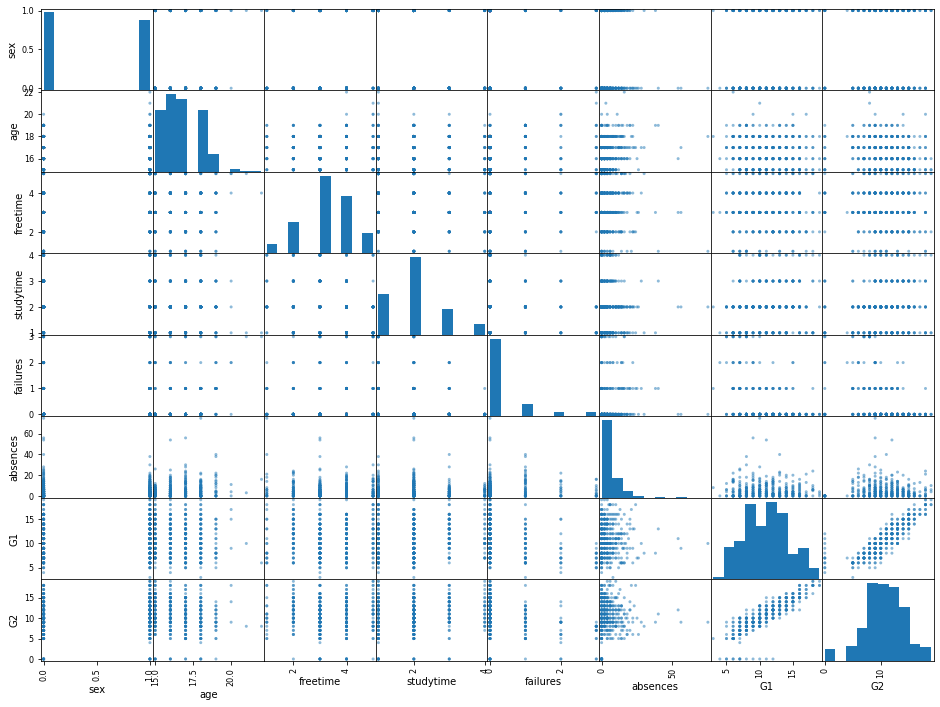

In [11]:
attributes = ['sex', 'age', 'freetime', 'studytime', 'failures', 'absences', 'G1', 'G2']

scatter_matrix(features[attributes], figsize=(16, 12))
print() # This print is only used to stop the spew from scatter_matrix

## Requirement #10:
Create any other plot of your preference

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

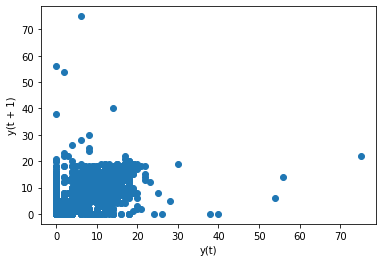

In [12]:
lag_plot(features[attributes])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

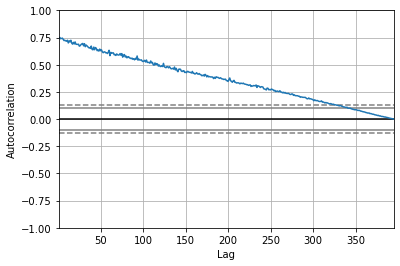

In [13]:
autocorrelation_plot(features[attributes])

<AxesSubplot:xlabel='G1', ylabel='G3'>

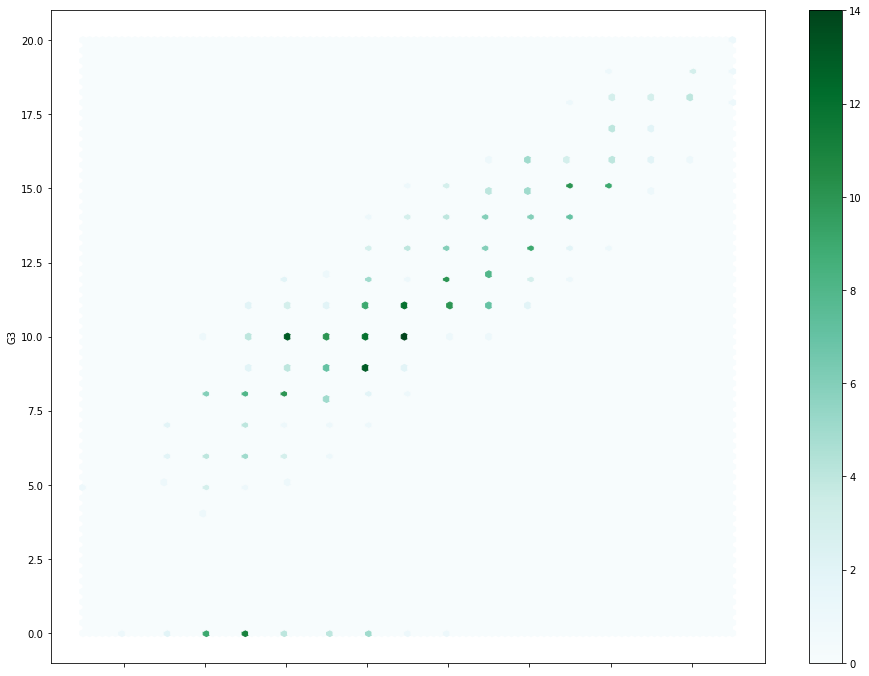

In [14]:
students.plot(kind="hexbin", x="G1", y="G3", figsize=(16, 12))